In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hi_measurements = pd.read_csv('hawaii_measurements.csv')
hi_stations = pd.read_csv('hawaii_stations.csv')

hi_measurements.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
print("# Station Entries: " + str(len(hi_measurements['station'].dropna())))
print("# Date Entries: " + str(len(hi_measurements['date'].dropna())))
print("# Prcp Entries: " + str(len(hi_measurements['prcp'].dropna())))
print("# TOBs Entries: " + str(len(hi_measurements['tobs'].dropna())))

# Station Entries: 19550
# Date Entries: 19550
# Prcp Entries: 18103
# TOBs Entries: 19550


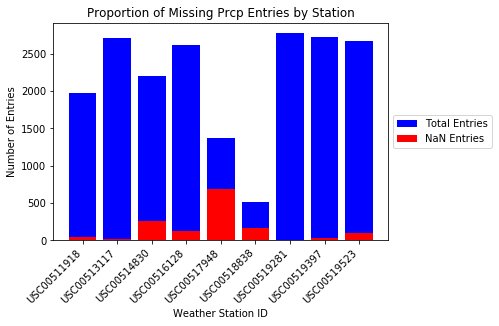

In [4]:
station_grps = hi_measurements.groupby(['station'])
na_counts = station_grps['date'].count()-station_grps['prcp'].count()
counts = station_grps['date'].count()
na_counts
x_axis = np.arange(9)
labels = na_counts.index.tolist()

fig,ax = plt.subplots()

ax.bar(x_axis,counts,color='blue',label='Total Entries')
ax.bar(x_axis,na_counts,label='NaN Entries',color='red')
plt.xticks(x_axis,labels,rotation=45,ha='right')
plt.xlabel('Weather Station ID')
plt.ylabel('Number of Entries')
plt.title('Proportion of Missing Prcp Entries by Station')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

plt.show()

In [5]:
stat_study = hi_measurements.set_index('station')
stat48 = pd.DataFrame(stat_study.loc("USC00517948"))
print(stat48)
# stat48 = stat_study.loc(stat_study['station'] == "USC00517948")
# stat48.head()

ValueError: DataFrame constructor not properly called!

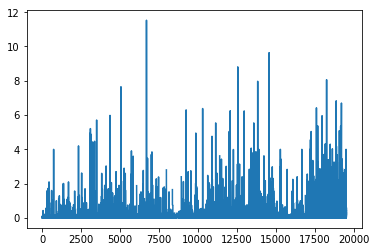

In [6]:
plt.clf()
fig, ax = plt.subplots()
x_axis = np.arange(len(hi_measurements))
ax.plot(x_axis,hi_measurements['prcp'])

plt.show()

In [7]:
clean_hi_measurements = hi_measurements.dropna(axis=0)
clean_hi_measurements.reset_index(drop=True,inplace=True)
clean_hi_measurements.to_csv('clean_hawaii_measurements.csv')

In [9]:
hi_stations

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
